# Practical work 4: Frequency filtering, color

In [2]:
import numpy as np
from numpy.fft import fft2,ifft2,fftshift,ifftshift
import matplotlib.pyplot as plt
from PIL import Image
from pylab import *
def imshow(I,title=None,size=500):
    """ display an image with a specific size """
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()


## Exercice 1 - Frequency filtering

1. Compute than display the centered module of Fourier transform of `img/mandrill.png` (use functions seen in previous lessons). 

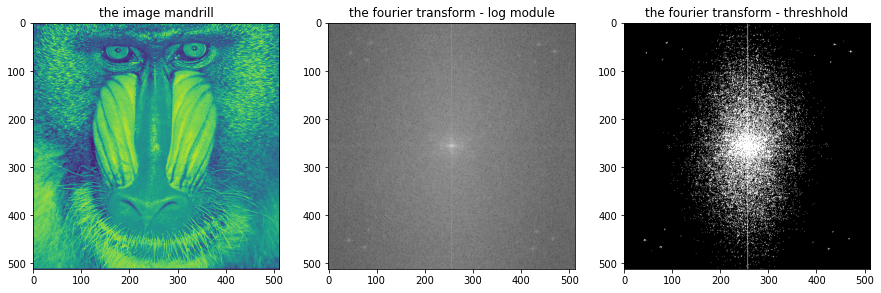

In [3]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    return np.where((I<s),0,255)
def computeFT(I):
    """ Array -> Array[complex] """
    return (fft2(I))
    

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    I=fftshift(If)
    return (np.abs(I))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    
    I=fftshift(If)
    return(np.log(1+np.abs(I)))


leana = np.array(Image.open("img/lena.jpg"))
mandrill = np.array(Image.open("img/mandrill.png"))

fig, (im1, im2, im3) = plt.subplots(1, 3, figsize=(15,9))

im1.set_title("the image mandrill")
im1.imshow(mandrill)


mydrill_fourier=computeFT(mandrill)

im2.set_title("the fourier transform - log module")
module_fourier=toVisualizeLogFT(mydrill_fourier)
im2.imshow(module_fourier,cmap='gray')

im3.set_title("the fourier transform - threshhold")
module_threshold=thresholdImage(module_fourier,10)
im3.imshow(module_threshold,cmap='gray')



2. Write a function `idealLowPassFilter(n,m,fc)` returning an ideal low pass filter with frequency cutoff $f_c$ and size $n\times m$. Recall: this function set to 1 pixels at Euclidian distance $f_c$ from the center (null frequency).

In [4]:
import math
def idealLowPassFilter(n,m,fc):
    filtre=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            if((math.sqrt((i-(n-1)/2)**2+(j-(m-1)/2)**2)<=fc)):
                filtre[i,j]=1
            else:
                filtre[i,j]=0
    return filtre 

3. Write a function `lowPass(I,fc)` performing a low pass filtering of an image $I$. The function should
 - compute the centered Fourier transform of $I$
 - multiply point-by-point the spectrum with the ideal low filter produced by `idealLowPassFilter()`
 - uncenter the filtered spectrum and apply the inverse Fourier transform (function `ifft2()` from module `numpy.fft`
 - return the real part of filtered image

In [5]:
def lowPass(I,fc):
    If=computeFT(I)
    If_filtrer=fftshift(If)*idealLowPassFilter(If.shape[0],If.shape[1],fc)
    If_uncetre=ifftshift(If_filtrer)
    inverse_If=ifft2(If_uncetre)
    return np.real(inverse_If)
    
            
    

4. Experiment this function on `img/mandrill.png` and `img/lena.jpg` with various values of cut off $f_c$.
 - give two effects that appears when $f_c$ decreases,
 - propose two applications of this filtering.


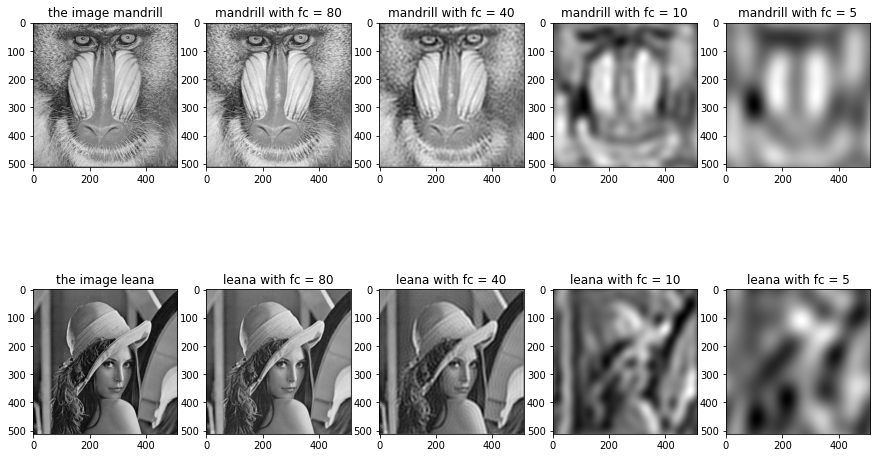

In [6]:
fig, ((im1, im2, im3, im4,im5), (im6, im7, im8, im9,im10)) = plt.subplots(2, 5, figsize=(15,9))
im1.set_title("the image mandrill")
im1.imshow(mandrill, cmap='gray')

im2.set_title("mandrill with fc = 80")
im2.imshow(lowPass(mandrill, 80), cmap='gray')

im3.set_title("mandrill with fc = 40")
im3.imshow(lowPass(mandrill, 40), cmap='gray')

im4.set_title("mandrill with fc = 10")
im4.imshow(lowPass(mandrill, 10), cmap='gray')

im5.set_title("mandrill with fc = 5")
im5.imshow(lowPass(mandrill, 5), cmap='gray')

im6.set_title("the image leana")
im6.imshow(leana, cmap='gray')

im7.set_title("leana with fc = 80")
im7.imshow(lowPass(leana, 80), cmap='gray')

im8.set_title("leana with fc = 40")
im8.imshow(lowPass(leana, 40), cmap='gray')

im9.set_title("leana with fc = 10")
im9.imshow(lowPass(leana, 10), cmap='gray')

im10.set_title("leana with fc = 5")
im10.imshow(lowPass(leana, 5), cmap='gray')


1/ the two effects that appears when  𝑓𝑐  decreases is : 

. The effects of smoothing increase.

. Noise reduction but at a certain point the image starts to lose its quality. 

2/ the two application of this filtre is : 

. Noise reduction,

. used to eliminate aliasing (Anti-aliasing filter)



## Exercice 2 -  Linear filtering (convolution)

1. Given a kernel convolution of size $d\times d$, $d$ being odd. How many lines and columns should be added to each side of the image to apply this filter? The image is supposed surrounded by zero values.

. we have to add [d/2] to each side of the image to apply this filtre

2. Write a function `imagePad(I,h)` getting an image and a kernel, returning a new image padded with zeros according to question 1. It is not allowed to use a module implementing the padding.

In [7]:
def imagePad(I,h):
    N=int((h.shape[0])/2)
    A=np.zeros((I.shape[0]+2*N,I.shape[1]+2*N))
    A[N:I.shape[0]+N,N:I.shape[1]+N]=I 
    return A
    

3. Write a function `conv2(I,h)` getting an image and a kernel and returning the convolution of $I$ by $h$. The function should return an image having the same shape than $I$. It is not allowed to use a module implementing the convolution.

In [8]:
def conv2(I,h):
    N=int((h.shape[0]-1)/2)
    pad_img=imagePad(I,h)
    conv=np.zeros((I.shape[0],I.shape[1]))
    cpt=0
    for x in range(N,I.shape[0]+N):
        for y in range(N,I.shape[1]+N):
            cpt=0
            for m in range(0,h.shape[0]):
                for n in range(0,h.shape[1]):
                    cpt=cpt+pad_img[x-m+N,y-n+N]*h[m,n]
            conv[x-N,y-N]=cpt
    return conv

4. Try this function on mean filter of size $3\times3$, $5\times 5$ and $7\times 7$. Discuss the results.

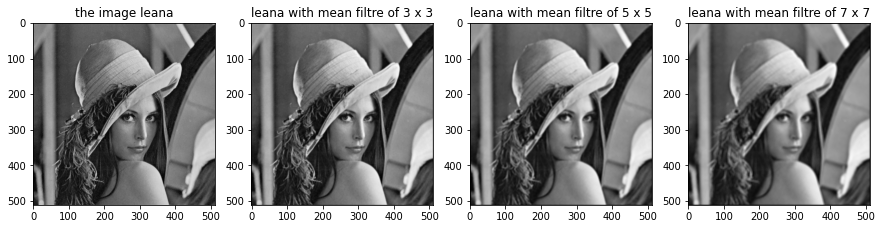

In [9]:
def meanfiltre(n):
    return (1/(n**2))*np.ones((n,n))
fig, (im1, im2, im3, im4) = plt.subplots(1, 4, figsize=(15,9))
im1.set_title("the image leana")
im1.imshow(leana, cmap='gray')

im2.set_title("leana with mean filtre of 3 x 3")
filtred_leana = conv2(leana, meanfiltre(3))
im2.imshow(filtred_leana, cmap='gray')

im3.set_title("leana with mean filtre of 5 x 5")
filtred_leana = conv2(leana, meanfiltre(5))
im3.imshow(filtred_leana, cmap='gray')

im4.set_title("leana with mean filtre of 7 x 7")
filtred_leana = conv2(leana, meanfiltre(7))
im4.imshow(filtred_leana, cmap='gray')

• We have each pixel is the average value of its neighborhood, so as long as the filter support is large, the neighborhood is large and therefore the pixels have after filtering values close to each other (smoothing effect) so : The effects of smoothing increase with the size d of the filter: smallest details (scales) disappear.

5. Display the transfert function of these mean filters. For a better visualization, use the zero-padding technique to obtain a filter with a large size (for instance $256\times 256$). Use `imshow()` and `toVisualizeLogFT()`.

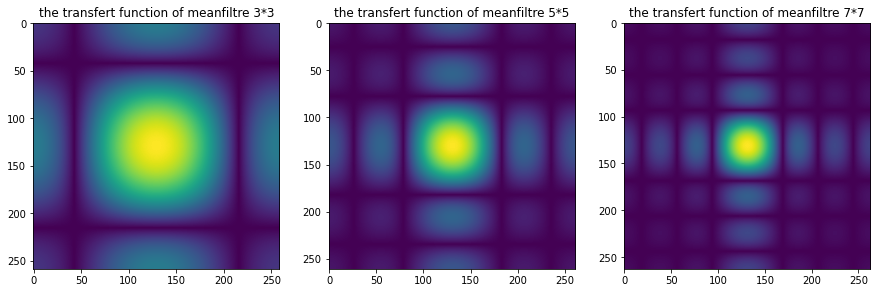

In [17]:
fig, (im1, im2, im3) = plt.subplots(1, 3, figsize=(15,9))

im1.set_title("the transfert function of meanfiltre 3*3")
image_pad=imagePad(meanfiltre(3),np.zeros((256,256)))
If=computeFT(image_pad)
im1.imshow(toVisualizeLogFT(If), cmap='viridis')

im2.set_title("the transfert function of meanfiltre 5*5")
image_pad=imagePad(meanfiltre(5),np.zeros((256,256)))
If=computeFT(image_pad)
im2.imshow(toVisualizeLogFT(If), cmap='viridis')

im3.set_title("the transfert function of meanfiltre 7*7")
image_pad=imagePad(meanfiltre(7),np.zeros((256,256)))
If=computeFT(image_pad)
im3.imshow(toVisualizeLogFT(If), cmap='viridis')

6. Interpretation: what is the analytic expression of the transfert function of a mean filter? Is  it an ideal low pass filter?

the analytic expression of the transfert function of a mean filter : $sinc(x, y)= \dfrac{\sin(x*\pi) * \sin(y*\pi)}{\pi*x*\pi*y}$ ,it is not an ideal low pass filter because the filter allows certain high frequencies to pass through

7. Bonus question: perform the same study for the Gaussian kernel. Determine $\sigma$ in order to have filter of size $3\times3$, $5\times5$, and $7\times7$.

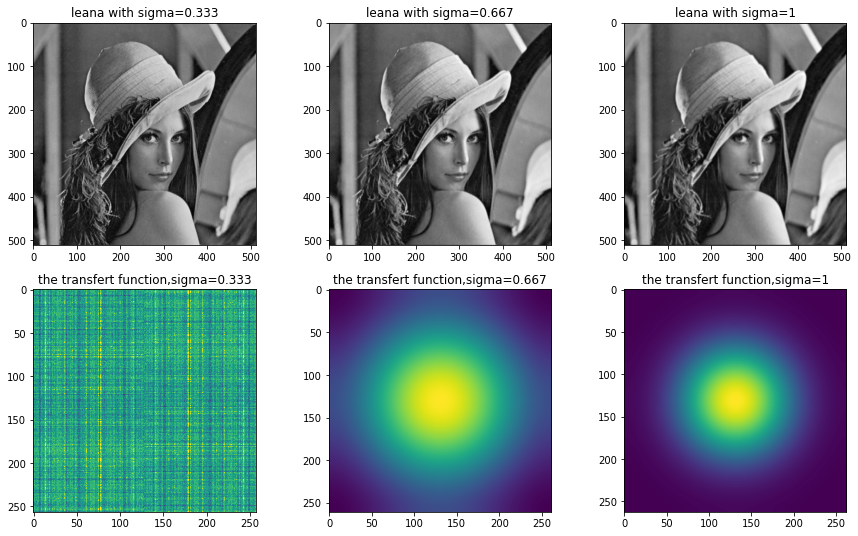

In [19]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = np.int(3*sigma)
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()
### your answer start below

fig, ((im2, im3, im4), (im5, im6, im7)) = plt.subplots(2, 3, figsize=(15,9))


im2.set_title("leana with sigma=0.333")
filtred_leana = conv2(leana,gaussianKernel(0.333))
im2.imshow(filtred_leana, cmap='gray')

im3.set_title("leana with sigma=0.667")
filtred_leana = conv2(leana,gaussianKernel(0.667))
im3.imshow(filtred_leana, cmap='gray')

im4.set_title("leana with sigma=1")
filtred_leana = conv2(leana,gaussianKernel(1))
im4.imshow(filtred_leana, cmap='gray')


im5.set_title("the transfert function,sigma=0.333")
image_pad=imagePad(gaussianKernel(0.333),np.zeros((256,256)))
If=computeFT(image_pad)
im5.imshow(toVisualizeLogFT(If), cmap='viridis')

im6.set_title("the transfert function,sigma=0.667")
image_pad=imagePad(gaussianKernel(0.667),np.zeros((256,256)))
If=computeFT(image_pad)
im6.imshow(toVisualizeLogFT(If), cmap='viridis')

im7.set_title("the transfert function,sigma=1")
image_pad=imagePad(gaussianKernel(1),np.zeros((256,256)))
If=computeFT(image_pad)
im7.imshow(toVisualizeLogFT(If), cmap='viridis')



## Exercice 3: anti aliasing filtering

1. Give a code that subsamples of factor 2 (use function `subSample2()` given in TME3) the image `img/barbara.png`.

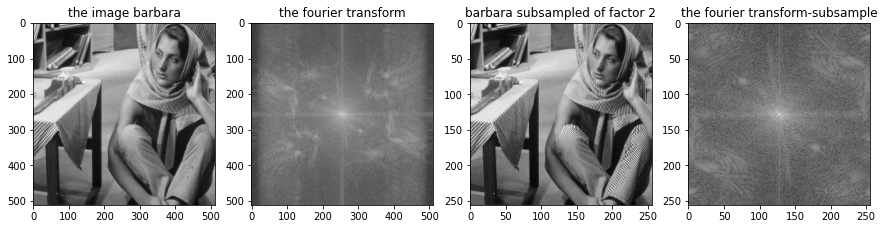

In [14]:
from PIL import Image
from numpy.fft import fft2, fftshift

barbara = np.array(Image.open('img/barbara.png'))

def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

fig, (im1, im2, im3,im4) = plt.subplots(1, 4, figsize=(15,9))

im1.set_title("the image barbara")
im1.imshow(barbara, cmap='gray')

im2.set_title("the fourier transform")
If=computeFT(barbara)
module_If=toVisualizeLogFT(If)
im2.imshow(module_If,cmap='gray')

im3.set_title("barbara subsampled of factor 2")
I=subSample2(barbara)
im3.imshow(I,cmap='gray')

im4.set_title("the fourier transform-subsample")
If=computeFT(I)
module_If=toVisualizeLogFT(If)
im4.imshow(module_If,cmap='gray')

2. Give a code that subsamples of factor 2 (use function `subSample2()`) the image `img/barbara.png` after applying an low pass filter (use `antiAliasingFilter()`). As comment, recall the principle of filtering in the frequency domain.

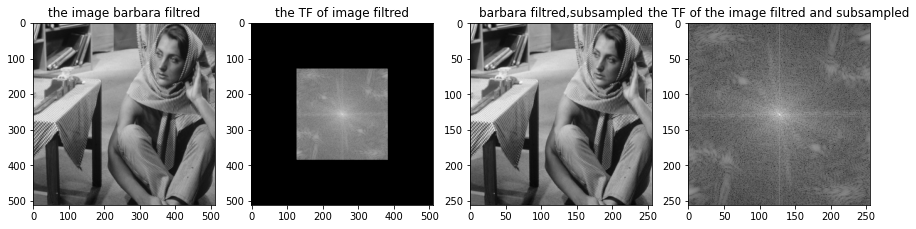

In [15]:
def antiAliasingFilter(n,m):
    """ int*int -> Array """
    n2, m2 = n//2, m//2
    rn, rm = n//4, m//4
    A = np.zeros((n, m))
    A[rn:rn+n2, rm:rm+m2] = 1
    return A
### your answer start below
If=computeFT(barbara)
If_filtrer=fftshift(If)*antiAliasingFilter(*If.shape)
If_uncetre=ifftshift(If_filtrer)
inverse_If=ifft2(If_uncetre)
barbara_filtered=np.real(inverse_If)

fig, (im1, im2, im3,im4) = plt.subplots(1, 4, figsize=(15,9))

im1.set_title("the image barbara filtred")
im1.imshow(barbara_filtered, cmap='gray')


im2.set_title("the TF of image filtred")
If=computeFT(barbara_filtered)
module_fourier=toVisualizeLogFT(If)
im2.imshow(module_fourier, cmap='gray')

im3.set_title("barbara filtred,subsampled")
I=subSample2(barbara_filtered)
im3.imshow(I,cmap='gray')

im4.set_title("the TF of the image filtred and subsampled")
If=computeFT(I)
module_fourier=toVisualizeLogFT(If)
im4.imshow(module_fourier,cmap='gray')

3. Describe and analyze the filtering of Barbara with and without the anti aliasing filter. What information is lost for the two filtered images ?

.with out filtring barbara we see that the Image barbara is sampled incorrectly because Subsampling has introduced aliasing effects.

.with the filter we can see that the sub-sampling is well done on the image and the aliasing effect is eliminated (the filter has extracted the desired part of the image),the filtre has restricted the bandwidth of a signal to satisfy the Nyquist–Shannon sampling theorem over the band of interest.

.We lost the high frequencies in the two filtred images.



## Exercice 4: color image
1. Read images `img/clown.bmp` and `img/clown_lumi.bmp` as two arrays named $I_1$ and $I_2$. Display these images examine their shape. What difference there are between them?

The shape of clown.bmp (512, 512, 3)
The shape of clown_lumi.bmp (512, 512)


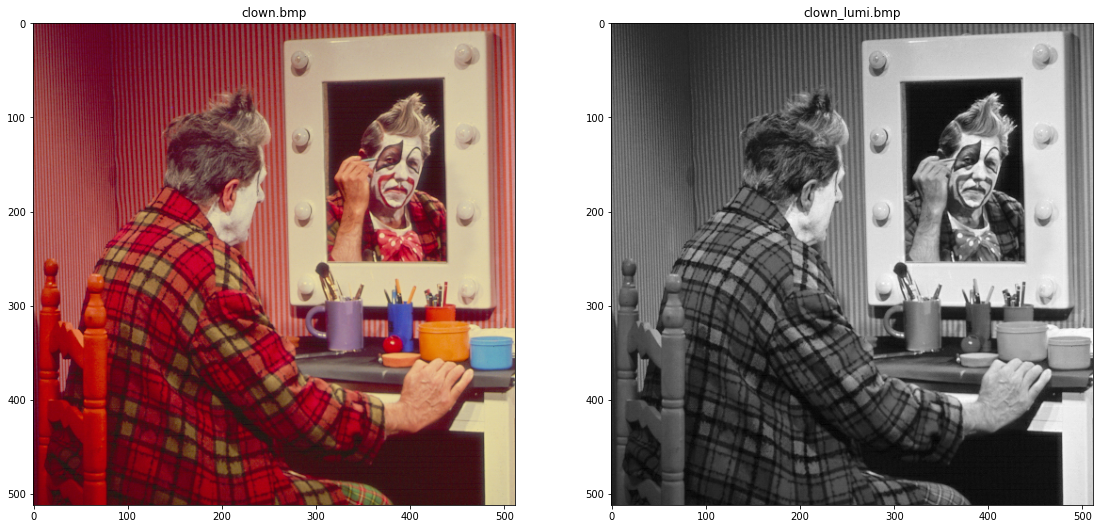

In [130]:
I1 = np.array(Image.open('img/clown.bmp'))
I2 = np.array(Image.open('img/clown_lumi.bmp'))
fig, (im1, im2) = plt.subplots(1, 2, figsize=(19,10))
im1.set_title("clown.bmp")
im1.imshow(I1)

im2.set_title("clown_lumi.bmp")
im2.imshow(I2)

print("The shape of clown.bmp",I1.shape)
print("The shape of clown_lumi.bmp",I2.shape)

1/ the first image have 3 dimension,the seconde have two dimension.



2/ the first image have an RGB mode which means they have 3 channels where red, green, and blue light are added together in various ways to reproduce a broad array of colors,and the seconde image have an L mode image, that means it is a single channel image. 



2. The first image is an array of dimension 3. Explain the signification of each dimension. From this image create 3 images $I_R$, $I_G$, $I_B$ of dimension 2. Display these three images and explain what you see.

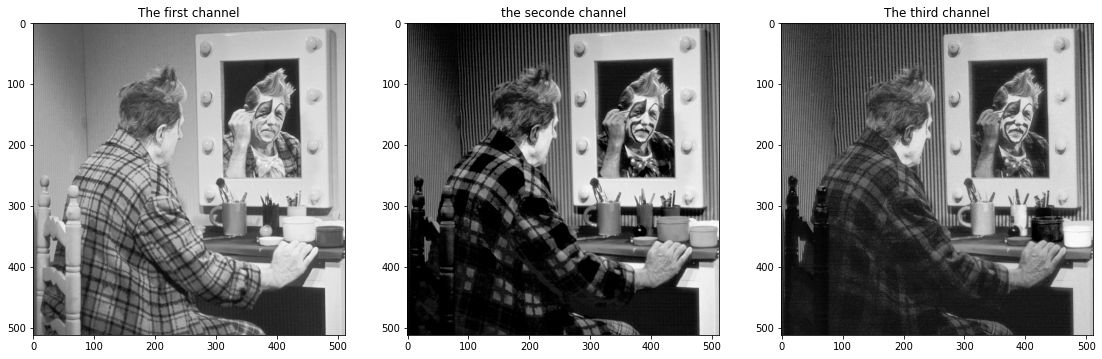

In [129]:
Ir=I1[:,:,0]
Ig=I1[:,:,1]
Ib=I1[:,:,2]
fig, (im1, im2, im3) = plt.subplots(1, 3, figsize=(19,10))
im1.set_title("The first channel")
im1.imshow(Ir)

im2.set_title("the seconde channel")
im2.imshow(Ig)

im3.set_title("The third channel")
im3.imshow(Ib)

1/ the first dimension represent the red channel,the seconde represent the green channel and the third represent the blue channel.  

2/ we divided the image into 3, so we separated the 3 channels, so each image has only one channel,which is red,green and blue channel.

3. Create a new image $I_3$ of dimensions 3, the first dimension contains the value of $I_R$, the second the value of $I_B$ and the third the values of $I_G$. Try another combinations. Remark: color images are better handled by `imshow()` if pixel values range in $[0,1]$.

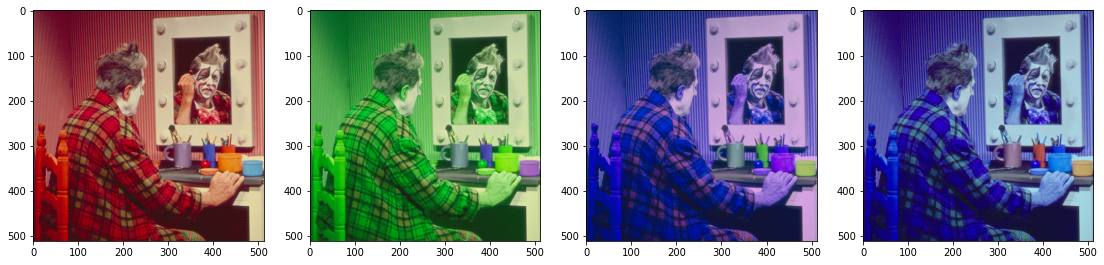

In [127]:
fig, (im1, im2, im3, im4) = plt.subplots(1, 4, figsize=(19,10))
#First Image
image1=Image.merge('RGB',(Image.fromarray(Ir),Image.fromarray(Ig),Image.fromarray(Ib)))
im1.imshow(image1)
#Seconde Image
image2=Image.merge('RGB',(Image.fromarray(Ig),Image.fromarray(Ir),Image.fromarray(Ib)))
im2.imshow(image2)
#Third Image
image3=Image.merge('RGB',(Image.fromarray(Ig),Image.fromarray(Ib),Image.fromarray(Ir)))
im3.imshow(image3)
#fourth Image
image4=Image.merge('RGB',(Image.fromarray(Ib),Image.fromarray(Ig),Image.fromarray(Ir)))
im4.imshow(image4)




4. Write a code that allows the see the first channel with red color scales, the second channel in green color scales, and the blue channel in blue color scales.

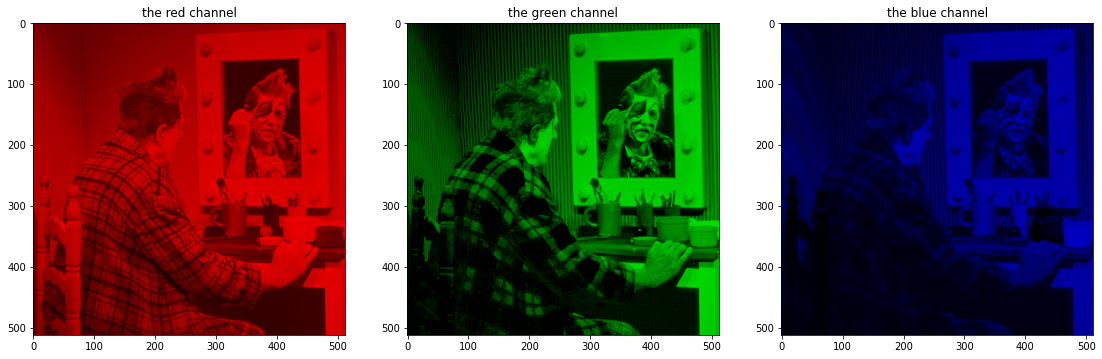

In [128]:
new_r = Image.new("L", Ir.shape)
fig, (im1, im2, im3) = plt.subplots(1, 3, figsize=(19,10))
im1.set_title("the red channel")
im_red = Image.merge("RGB", (Image.fromarray(Ir), new_r, new_r))
im1.imshow(im_red)
im2.set_title("the green channel")
im_green = Image.merge("RGB", (new_r, Image.fromarray(Ig), new_r))
im2.imshow(im_green)
im3.set_title("the blue channel")
im_blue = Image.merge("RGB", (new_r, new_r,Image.fromarray(Ib)))
im3.imshow(im_blue)